####[산점도 그래프]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
-연속형(수치형) 데이터에 사용함

In [2]:
# [1]
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2]
file_name= r'C:\Users\KDP-25\Desktop\EX_PANDAS06\data\auto_mpg.csv'

In [4]:
# [3]
dataDF= pd.read_csv(file_name)

In [5]:
# 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
# [4] 컬럼별로 이상한 값 즉, 이상치 체크 및 시각화
dataDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


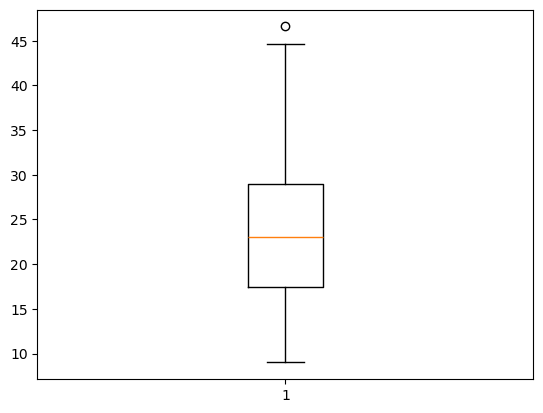

In [9]:
# - 박스 그래프로 시각화
retDic= plt.boxplot(dataDF['mpg']) #whis= 1.5(기본)
plt.show()

In [13]:
# 박스 그래프에서 받은 결과 확인
# 박스 그래프-> dict로 반환 -> dict안 vale값이 리스트 형태로 line2d obj가 존재
# obj니까 getdata를 통해 값 볼 수 있음
for k, v in retDic.items():
    print(k,v)
    for _ in v:
        print(_.get_data())

# medians->[0.925, 1.075],   중앙 노란선(중앙값)인걸 알 수 있음(좌표형태로 이해하면 편함)
            # [23., 23]         (.925, 23), (1.075, 23)


# ==>caps를 통해 이상치 기준 파악할 수 있음



whiskers [<matplotlib.lines.Line2D object at 0x000002294E6EBBE0>, <matplotlib.lines.Line2D object at 0x000002294E6EBE80>]
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 44.6]))
caps [<matplotlib.lines.Line2D object at 0x000002294E70A160>, <matplotlib.lines.Line2D object at 0x000002294E70A400>]
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([44.6, 44.6]))
boxes [<matplotlib.lines.Line2D object at 0x000002294E6EB940>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians [<matplotlib.lines.Line2D object at 0x000002294E70A6A0>]
(array([0.925, 1.075]), array([23., 23.]))
fliers [<matplotlib.lines.Line2D object at 0x000002294E70A940>]
(array([1.]), array([46.6]))
means []


In [23]:
# 하위/상위 이상치 값 추출

outliers=retDic['caps']
low_outlier= outliers[0].get_data()[1].tolist()[0]  
upper_outlier= outliers[1].get_data()[1].tolist()[0]


In [24]:
# 이상치 처리
dataDF[dataDF['mpg']<low_outlier]
dataDF[dataDF['mpg']>upper_outlier]

# 버려야 할지 말지 판단이 안되면-->둘다 해보기...

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
